### Inspect Stackoverflow employment data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

%matplotlib inline

import os
print (os.getcwd()) #get current working directory


c:\Users\Ramona\Documents\Vs_code projects\Udacity_project\udacity-data-science-project-1\notebooks


### First have a look at the dataset and the schema of the dataset


### Step 1: Gather data

In [8]:
# Load in data
df = pd.read_csv("../data/survey_results_public.csv")
# Take a look at the data
df.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
num_rows_n = df.shape[0]  # Provide the number of rows in the dataset
num_cols_n = df.shape[1]  # Provide the number of columns in the dataset
print(f"Number of rows: {num_rows_n} \nNumber of columns: {num_cols_n}")


Number of rows: 51392 
Number of columns: 154


Read in schema for understanding the questions

In [7]:
df2 = pd.read_csv("../data/survey_results_schema.csv")
df2.head()


,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


### Step 2: Assess data

In [8]:
# check data types
df.dtypes


Respondent                int64
Professional             object
ProgramHobby             object
Country                  object
University               object
                         ...   
QuestionsInteresting     object
QuestionsConfusing       object
InterestedAnswers        object
Salary                  float64
ExpectedSalary          float64
Length: 154, dtype: object

In [9]:
# which variables have no null values in thedataset?
no_nulls = set(df.columns[df.isnull().mean() == 0])
no_nulls


{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [10]:
pd.set_option("display.max_rows", None)
df.isnull().sum().sort_values()


Respondent                              0
Professional                            0
ProgramHobby                            0
Country                                 0
University                              0
EmploymentStatus                        0
FormalEducation                         0
YearsProgram                          247
PronounceGIF                          384
HomeRemote                           7384
MajorUndergrad                       8551
CareerSatisfaction                   8697
ClickyKeys                           9346
YearsCodedJob                       10502
JobSatisfaction                     11016
CompanySize                         12470
TabsSpaces                          12541
CompanyType                         12569
StackOverflowDescribes              14460
WorkStart                           14696
HaveWorkedLanguage                  14767
StackOverflowSatisfaction           14800
AuditoryEnvironment                 14935
DeveloperType                     

In [11]:
# only one respondent per row?
df["Respondent"].nunique() == df.shape[0]


True

In [12]:
# which variables have a lot of nulls?
print(df.columns[df.isnull().mean() > 0.8])


Index(['YearsCodedJobPast', 'MobileDeveloperType', 'NonDeveloperType',
       'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years',
       'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode',
       'ExCoderActive', 'TimeAfterBootcamp', 'ExpectedSalary'],
      dtype='object')


In [13]:
df.describe()


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### Hypothesis: the possibility of working from home leads to higher JobSatisfaction

### How does descriptive data for Hypothesis look like?

In [14]:
# How does the Home Remote question look like?
list(df2[df2.Column == "HomeRemote"]["Question"])


['How often do you work from home or remotely?']

In [15]:
# How does the job satisfaction question look like?
list(df2[df2.Column == "JobSatisfaction"]["Question"])


['Job satisfaction rating']

In [16]:
# How do the answers look like?
hr = df["HomeRemote"].value_counts().reset_index()
hr.head()


,index,HomeRemote
0,A few days each month,15454
1,Never,13975
2,All or almost all the time (I'm full-time remote),4905
3,"Less than half the time, but at least one day ...",4147
4,"More than half, but not all, the time",1909


A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64


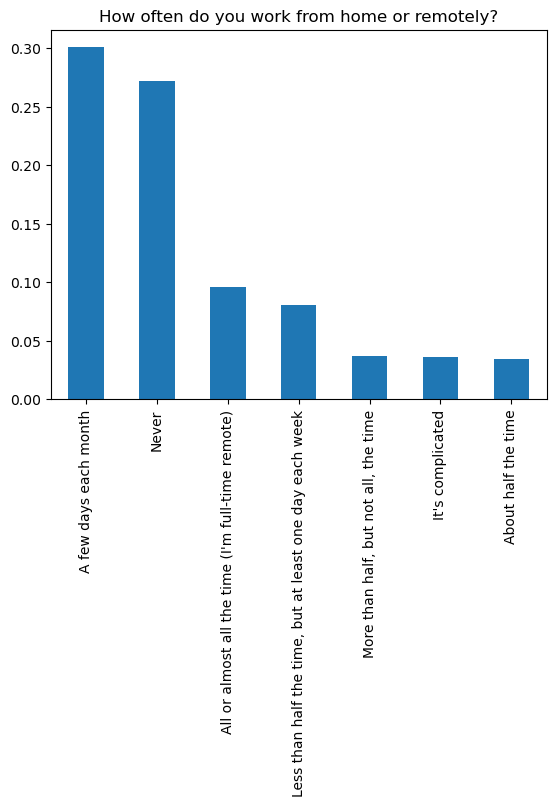

In [16]:
# some graphs for Home Remote
status_vals = df.HomeRemote.value_counts()
print(status_vals)
(status_vals / df.shape[0]).plot(kind="bar")
plt.title("How often do you work from home or remotely?")


Bin some of these values for easier overview

Sometimes    25128
Never        13975
Always        4905
Name: HomeRemote_cat, dtype: int64


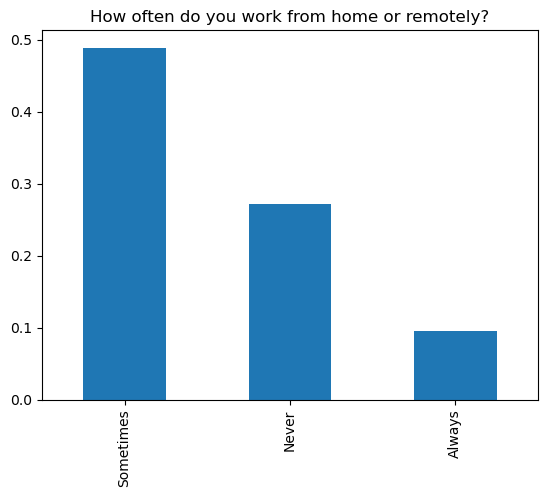

In [11]:
home_remote_categories = {
    "More than half, but not all, the time": "Sometimes",
    "Less than half the time, but at least one day each week": "Sometimes",
    "Never": "Never",
    "All or almost all the time (I'm full-time remote)": "Always",
    "It's complicated": "Sometimes",
    "A few days each month": "Sometimes",
    "About half the time": "Sometimes",
}

df["HomeRemote_cat"] = df["HomeRemote"].map(home_remote_categories)
status_vals = df["HomeRemote_cat"].value_counts()
print(status_vals)
(status_vals / df.shape[0]).plot(kind="bar")
plt.title("How often do you work from home or remotely?")


Job Satisfaction Overview

In [18]:
df2[df2["Column"] == "JobSatisfaction"]


,Column,Question
19,JobSatisfaction,Job satisfaction rating


In [19]:
fig = px.histogram(df, x="JobSatisfaction")
fig.show()


Currency all in $?

In [20]:
df2[df2["Column"] == "Salary"]


,Column,Question
152,Salary,"What is your current annual base salary, befor..."


In [27]:
fig = px.histogram(df, x="Salary")
fig.show()


In [21]:
fig = px.histogram(df, x="HoursPerWeek")
fig.show()


looks weird, why? when checking question:

In [22]:
df2[df2["Column"] == "HoursPerWeek"]


,Column,Question
47,HoursPerWeek,"During a typical week, approximately how many ..."


It's about job seeking time spend

##### Step 3: Data Cleaning

What about countries?

In [23]:
df["Country"].value_counts()[:5]


United States     11455
India              5197
United Kingdom     4395
Germany            4143
Canada             2233
Name: Country, dtype: int64

Only keep top 6 countries, rest to other (binning)

In [9]:
df["country_groups"] = np.where(
    df["Country"].isin(
        ["United States", "India", "United Kingdom", "Germany", "France"]
    ),
    df["Country"],
    "Other",
)


When we want to use them for Regression we need to make this to dummy variables:

In [12]:
df_country_dummies = pd.get_dummies(df["country_groups"])
df_home_remote = pd.get_dummies(df["HomeRemote_cat"])

df = pd.concat([df.reset_index(drop=True), df_country_dummies, df_home_remote], axis=1)
df.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HomeRemote_cat,France,Germany,India,Other,United Kingdom,United States,Always,Never,Sometimes
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,0,0
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Sometimes,0,0,0,0,1,0,0,0,1
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Sometimes,0,0,0,0,1,0,0,0,1
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Sometimes,0,0,0,0,0,1,0,0,1
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,Never,0,0,0,1,0,0,0,1,0


### Step 4: Analyze data

### Is job satisfaction correlated with Countries?
### Is job satisfaction correlated with Working from Home?
### Is job satisfaction correlated with Salary?

#### Check correlation

In [26]:
# correlation table example
# df_corr = df[["JobSatisfaction", "Salary", "HoursPerWeek"]]
corr = df[
    [
        "JobSatisfaction",
        "Salary",
        "United States",
        "India",
        "United Kingdom",
        "Germany",
        "Always",
        "Never",
        "Sometimes",
    ]
].corr()
corr.style.background_gradient(cmap="coolwarm")


,JobSatisfaction,Salary,United States,India,United Kingdom,Germany,Always,Never,Sometimes
JobSatisfaction,1.000000,0.120765,0.055968,-0.118055,0.013415,0.007233,0.069202,-0.100828,0.051264
Salary,0.120765,1.000000,0.644508,-0.300701,-0.032169,-0.033937,0.123952,-0.167309,0.096095
United States,0.055968,0.644508,1.000000,-0.179634,-0.163777,-0.158588,0.030822,-0.068504,0.062207
India,-0.118055,-0.300701,-0.179634,1.000000,-0.102571,-0.099321,-0.019113,-0.000322,-0.020924
United Kingdom,0.013415,-0.032169,-0.163777,-0.102571,1.000000,-0.090554,-0.018346,0.031099,-0.000546
Germany,0.007233,-0.033937,-0.158588,-0.099321,-0.090554,1.000000,-0.041455,0.049859,-0.005392
Always,0.069202,0.123952,0.030822,-0.019113,-0.018346,-0.041455,1.000000,-0.198516,-0.317726
Never,-0.100828,-0.167309,-0.068504,-0.000322,0.031099,0.049859,-0.198516,1.000000,-0.597778
Sometimes,0.051264,0.096095,0.062207,-0.020924,-0.000546,-0.005392,-0.317726,-0.597778,1.000000


# 

### Check Regression

In [7]:
def make_regression(df: pd.DataFrame) -> LinearRegression:
    """
    It takes a dataframe, drops all the rows with missing values, and then fits a linear regression
    model to the data

    :param df: the dataframe
    :type df: pd.DataFrame
    :return: A linear regression model
    """
    df_reg = df[
        [
            "JobSatisfaction",
            "Salary",
            "United States",
            "India",
            "United Kingdom",
            "Germany",
            "Always",
            "Sometimes",
        ]
    ].dropna()
    y = df_reg["JobSatisfaction"].dropna().values
    x = (
        df_reg[
            [
                "Salary",
                "United States",
                "India",
                "United Kingdom",
                "Germany",
                "Always",
                "Sometimes",
            ]
        ]
        .dropna()
        .values
    )
    reg = LinearRegression().fit(x, y)
    return reg


In [27]:
# Regression
from sklearn.linear_model import LinearRegression

df_reg = df[
    [
        "JobSatisfaction",
        "Salary",
        "United States",
        "India",
        "United Kingdom",
        "Germany",
        "Always",
        "Sometimes",
    ]
].dropna()
y = df_reg["JobSatisfaction"].dropna().values
x = (
    df_reg[
        [
            "Salary",
            "United States",
            "India",
            "United Kingdom",
            "Germany",
            "Always",
            "Sometimes",
        ]
    ]
    .dropna()
    .values
)
reg = LinearRegression().fit(x, y)


In [28]:
import statsmodels.api as sm

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              6095.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                        0.00
Time:                        17:06:32   Log-Likelihood:                         -34334.
No. Observations:               12852   AIC:                                  6.868e+04
Df Residuals:                   12845   BIC:                                  6.873e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.543e-05   9.23e-07     60.059      0.000    5.36e-05    5.72e-05
x2            -0.8650      0.095     -9.117      0.000      -1.051      -0.679
x3             3.1129      0.127     24.547      0.000       2.864       3.361
x4             1.9304      0.103     18.687      0.000       1.728       2.133
x5             1.9779      0.119     16.635      0.000       1.745       2.211
x6             3.3492      0.127     26.325      0.000       3.100       3.599
x7             3.5115      0.058     60.499      0.000       3.398       3.625
==============================================================================
Omnibus:                       65.290   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.975
Skew:                          -0.163   Prob(JB):                     7.78e-15
Kurtosis:                       2.875   Cond. No.                     3.07e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Only use quant variables and drop any rows with missing values
num_vars = df[
    [
        "Salary",
        "CareerSatisfaction",
        "HoursPerWeek",
        "JobSatisfaction",
        "StackOverflowSatisfaction",
    ]
]

# Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=["Salary"], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

# Split into explanatory and response variables
X = fill_df[
    [
        "CareerSatisfaction",
        "HoursPerWeek",
        "JobSatisfaction",
        "StackOverflowSatisfaction",
    ]
]
y = fill_df["Salary"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

lm_model = LinearRegression(normalize=True)  # Instantiate
lm_model.fit(X_train, y_train)  # Fit

# Predict and score the model
y_test_preds = lm_model.predict(X_test)


NameError: name 'train_test_split' is not defined